In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
import re
from collections import Counter 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gensim 
from gensim.models import Word2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# doc2Vec package:
import gensim.models as g
import logging
# RNN:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guochenxin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guochenxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guochenxin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
comments = pd.read_excel('/Users/guochenxin/Desktop/text classification/Copy of inforce insurance portal comment sample.xlsx')
comments.dropna(subset=['NPS Comment/Enhance', 'OTHER'],how = 'all', inplace = True)
comments.head()

,Month,NPS/Ease,Good \nBad \nNeutral,Category,NPS Comment/Enhance,OTHER
0,September,Passive,G,misc,Pretty OK,NaN
1,September,Promoter,G,product/industry,"My advisor is very knowledgeable, uses the bes...",NaN
2,September,Promoter,G,product/industry,I have a good agent here in Honolulu. I think ...,NaN
3,September,Promoter,G,product/industry,Very good product offering.,NaN
4,September,Promoter,G,product/industry,JH has the best IUL's in the industry,NaN


In [37]:
wordlist=[]
for i in range(comments.shape[0]):
    if comments['NPS Comment/Enhance'].isnull()[i] ==True:
        continue
    else:
        pattern = '\s|[,.!%-:]'
        a = re.split(pattern, comments['NPS Comment/Enhance'][i])
   
        length = len(a)
        j=0
        while j < length:
            if (a[j] == ''):
                a.remove(a[j])
                length = length - 1
                continue
            j = j+1
        for word in a:
            wordlist.append(word)
print(wordlist)

KeyError: 20

In [145]:
# for i in range(comments.shape[0]):
#     if comments['NPS Comment/Enhance'].isnull()[i] ==True:
#         continue
#     else:
#         a = re.split(pattern, comments['NPS Comment/Enhance'][i])
#         print(a)

words = list(map(lambda x:x.lower(),wordlist))

In [151]:
all_words = [w for w in words if not w in stopwords] 
all_words[:4]

['pretty', 'ok', 'advisor', 'knowledgeable']

In [50]:
comments['NPS Comment/Enhance'] = comments['NPS Comment/Enhance'].astype(str)
comments['OTHER'] = comments['OTHER'].astype(str)
texts1 = ' '.join([w for w in comments['NPS Comment/Enhance']])
texts1 = texts1.lower()
texts2 = ' '.join([w for w in comments['OTHER']])
texts2 = texts2.lower()
texts = texts1+' '+texts2

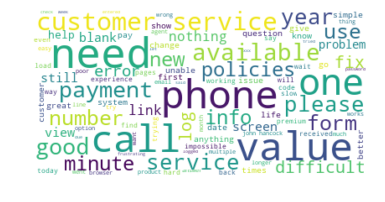

In [268]:
stopwords = set(STOPWORDS)
stopwords.update(['nan','url',"website",'web','online', "site", "information", "policy", "time", 'account', 'company', 'page', 'login','access','make', 'insurance', 
                  'work','see','now','jh','able','t'])

wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(texts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("first_review.png")

In [52]:
from collections import Counter 
Counter = Counter(word for word in words if word not in stopwords) 
most_occur = Counter.most_common(10) 
most_occur

[('good', 5),
 ('best', 3),
 ('great', 3),
 ('service', 3),
 ('easy', 3),
 ('think', 2),
 ('customer', 2),
 ('e', 2),
 ('mailed', 2),
 ('pretty', 1)]

In [95]:
# sentence without removing stopwords
sent = [word_tokenize(sent) for sent in sent_tokenize(texts)]

# sentence remove stopwords:
#stop_words = set(stopwords.words('english')) 
stop_words = set(STOPWORDS)
stop_words.update([ "information",  'company', 'page', 'login', 'insurance', 
                  'now','jh','john', 'hancock'])

sent_tokenize(texts)
sent_list=[]
for sentence in sent_tokenize(texts):
    tokenizer = RegexpTokenizer(r'\w+') # get rid of punctuation
    word_tokens = tokenizer.tokenize(sentence)
   #word_tokens = word_tokenize(sentence)
    words_set = [w for w in word_tokens if not w in stop_words] 
    sent_list.append(words_set)
    
model1 = gensim.models.Word2Vec(sent_list, min_count = 1, size = 100, window = 5) 

In [96]:
model1.similarity('missing', 'error')

C:\Users\guochen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.039576553

In [97]:
sim_words =model1.wv.most_similar('recommend')
sim_words

[('brought', 0.3613798916339874),
 ('show', 0.2987709045410156),
 ('paid', 0.2984021306037903),
 ('saved', 0.28848978877067566),
 ('quarterly', 0.27528831362724304),
 ('cases', 0.27164143323898315),
 ('despite', 0.26988911628723145),
 ('usually', 0.26644980907440186),
 ('couldn', 0.23408208787441254),
 ('hoping', 0.2305145561695099)]

In [98]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(sent_list, min_count = 2, size = 100, window = 5, sg = 1) 
model2.similarity('missing', 'error')

C:\Users\guochen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


0.4606204

In [99]:
sim_words =model2.wv.most_similar('recommend')
sim_words

[('show', 0.6827774047851562),
 ('find', 0.6678767800331116),
 ('value', 0.6616883277893066),
 ('policies', 0.6598153710365295),
 ('website', 0.6586673259735107),
 ('premium', 0.6573193073272705),
 ('data', 0.6469952464103699),
 ('nan', 0.6466132998466492),
 ('nothing', 0.6434758901596069),
 ('policy', 0.6430102586746216)]

In [101]:
print("Cosine similarity between 'web' " + "website - Skip Gram : ", model2.similarity('web', 'website')) 

Cosine similarity between 'web' website - Skip Gram :  0.93752456


C:\Users\guochen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
C:\Users\guochen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


# Word Embedding techniques (3 ways) #
Vectorize consumer comments text, by turning each text into either a sequence of integers or into a vector.

### bag of words models: ###

In [279]:
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(final_sent)
# Show the Bag-of-Words Model as a pandas DataFrame

feature_names = count_vectorizer.get_feature_names()

pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,abil,abl,absolut,absurd,acc,accept,access,accomplish,account,accur,...,wouldn,write,wrong,wtf,xx,xxx,year,yes,yet,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF: ###

In [61]:
comments['OTHER'].fillna(' ', inplace = True)
comments['comments'] = comments['NPS Comment/Enhance']+ ' '+comments['OTHER']

sent1 = comments['comments'].tolist()
sent_remove_punc=[]
for sent in sent1:
    pattern = r"[^\w]"
    temp = re.sub(pattern, " ", str(sent)) # remove punctuation
    pattern_dig = r"[\d]"
    sent_remove_punc.append(re.sub(pattern_dig, " ", str(temp))) # remove digtals
sent_remove_punc
    
stop_words = set(STOPWORDS)
stop_words.update([ "information",  'company', 'page', 'login', 'insurance', 
                  'now','jh','john', 'hancock'])

lemmatizer = WordNetLemmatizer() 
stemmer = SnowballStemmer("english")
final_sent = []
for sent in sent_remove_punc:
    new_sent_words = []
    word_token = word_tokenize(sent)
    for w in word_token:
        new_w = stemmer.stem(w) # grouping together the different inflected forms of a word so they can be analysed as a single item
        new_w = lemmatizer.lemmatize(new_w)
        new_sent_words.append(new_w)
    new_sent_word_list = [i for i in new_sent_words if not i in stop_words] # remove unnecessary stopwords
    new_sent = ' '.join(new_sent_word_list)
    final_sent.append(new_sent)
final_sent # reduce columns number from 1157 to 882

tfidf = TfidfVectorizer()
values = tfidf.fit_transform(final_sent)
feature_names = tfidf.get_feature_names()
tfidf_model = pd.DataFrame(values.toarray(), columns = feature_names)
tfidf_model = tfidf_model.iloc[:, 32:]
print(tfidf_model.shape)
tfidf_model.head()

(288, 882)


,alon,alreadi,altern,although,alway,america,amount,ani,annoy,annual,...,wouldn,write,wrong,wtf,xx,xxx,year,yes,yet,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### doc2Vec ###
### Please see the link for reference https://github.com/jhlau/doc2vec ###

In [39]:
# data1 = np.load('/Users/guochenxin/Desktop/apnews_dbow/doc2vec.bin.syn0.npy')
# print(data1.shape)
# data2 = np.load('/Users/guochenxin/Desktop/apnews_dbow/doc2vec.bin.syn1neg.npy')
# print(data2.shape)

In [40]:
# # wrote preprocessed text list into txt file
# File_object = open(r"/Users/guochenxin/Desktop/text classification/train_texts.txt","w+")
# for i in final_sent:
#     File_object.writelines(i)
#     File_object.write('\n')
# File_object.close()

# import gensim.models as g
# import logging

# #doc2vec parameters
# vector_size = 300
# window_size = 15
# min_count = 1
# sampling_threshold = 1e-5
# negative_size = 5
# train_epoch = 100
# dm = 0 #0 = dbow; 1 = dmpv
# worker_count = 1 #number of parallel processes

# #pretrained word embeddings
# pretrained_emb = "/Users/guochenxin/Desktop/text classification/doc2vec/toy_datatoy_data/pretrained_word_embeddings.txt" 
# #None if use without pretrained embeddings

# #input corpus
# train_corpus = "/Users/guochenxin/Desktop/text classification/train_texts.txt"

# # output model
# # saved_path = "/Users/guochenxin/Desktop/model.bin"

# #enable logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# #train doc2vec model
# docs = g.doc2vec.TaggedLineDocument(train_corpus)
# model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, 
#                   sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, 
#                   dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)

# # save model
# # model.save(saved_path)

In [66]:
model="/Users/guochenxin/Desktop/text classification/apnews_dbow/doc2vec.bin"
m = g.Doc2Vec.load(model)
start_alpha=0.01
infer_epoch=1000

res = []

for text in final_sent:
    res.append(m.infer_vector([text],alpha=start_alpha, steps=infer_epoch))
doc2vec_matrix = np.array(res)

In [16]:
doc2vec_matrix.shape

(288, 300)

In [8]:
# Get the vectors
doc2vec_matrix[287].shape

(300,)

### Data Reconstruction and EDA ###

In [42]:
comments_labels = pd.DataFrame(final_sent, columns = ['comments'])
comments_labels['class'] = comments['Category']
print(comments_labels['class'].isnull().sum())
comments_labels.dropna(subset = ['class'], inplace = True)
print(comments_labels.shape)
comments_labels.head()

22
(266, 2)


,comments,class
0,pretti ok,misc
1,advisor veri knowledg use best tool keep best ...,product/industry
2,good agent honolulu think reliabl compani,product/industry
3,veri good product offer,product/industry
4,ha best iul s industri,product/industry


In [43]:
# combine labels:
comments_labels.loc[comments_labels['class'] == 'funcitonality', 'class'] = 'functionality'
comments_labels.loc[comments_labels['class'] == 'industry/product', 'class'] = 'product/industry'
comments_labels.loc[(comments_labels['class'] == 'misc')|(comments_labels['class'] =='neutral'), 'class'] = 'other' 
comments_labels['class'].value_counts()

error/fail            98
usability             78
service               35
functionality         30
product/industry      11
login/authenticate    11
other                  3
Name: class, dtype: int64

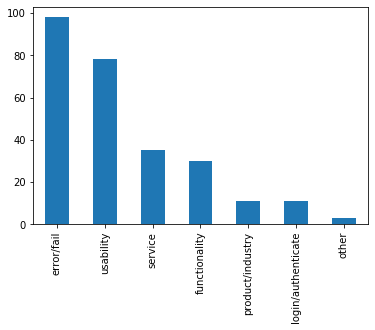

In [44]:
comments_labels['class'].value_counts().plot.bar()

# Multi-Class Text Classification Modelling: 3 ways #
###  Recurrent Neural Network (RNN) using the Long Short Term Memory (LSTM) ###

In [45]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

'''
comments_labels['comments']
a = 'i am a good girl'
max_len = 0
for i in comments_labels['comments']:
    if len(word_tokenize(i)) > max_len:
        max_len = len(word_tokenize(i))
max_len
'''

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 117
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 117
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(comments_labels['comments'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 899 unique tokens.


In [46]:
X = tokenizer.texts_to_sequences(comments_labels['comments'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (266, 117)


Converting categorical labels to numbers.

In [47]:
Y = pd.get_dummies(comments_labels['class']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (266, 7)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(186, 117) (186, 7)
(80, 117) (80, 7)


In [24]:
model1 = Sequential()
model1.add(Embedding(1174, 64, input_length=X.shape[1])) # input_dim: This is the size of the vocabulary in the text data: len(word_index)
model1.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(7, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs =20
batch_size = 32

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 167 samples, validate on 19 samples
Epoch 1/20
167/167 [==============================] - 2s 12ms/step - loss: 1.9160 - accuracy: 0.3114 - val_loss: 1.6895 - val_accuracy: 0.4211
Epoch 2/20
167/167 [==============================] - 1s 5ms/step - loss: 1.6576 - accuracy: 0.3892 - val_loss: 1.4441 - val_accuracy: 0.4211
Epoch 3/20
167/167 [==============================] - 1s 5ms/step - loss: 1.6628 - accuracy: 0.2635 - val_loss: 1.6111 - val_accuracy: 0.4211
Epoch 4/20
167/167 [==============================] - 1s 5ms/step - loss: 1.6627 - accuracy: 0.3892 - val_loss: 1.5927 - val_accuracy: 0.4211
Epoch 5/20
167/167 [==============================] - 1s 5ms/step - loss: 1.5836 - accuracy: 0.3892 - val_loss: 1.4711 - val_accuracy: 0.4211
Epoch 6/20
167/167 [==============================] - 1s 5ms/step - loss: 1.6051 - accuracy: 0.3892 - val_loss: 1.4027 - val_accuracy: 0.4211
Epoch 7/20
167/167 [==============================] - 1s 5ms/step - loss: 1.5927 - accuracy: 0.2814 - 

In [25]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

80/80 [==============================] - 0s 4ms/step
Test set
  Loss: 1.445
  Accuracy: 0.412


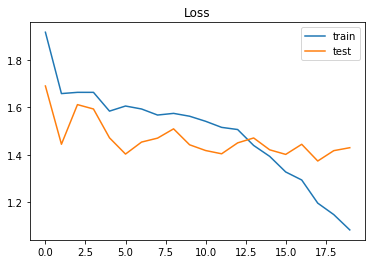

In [26]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

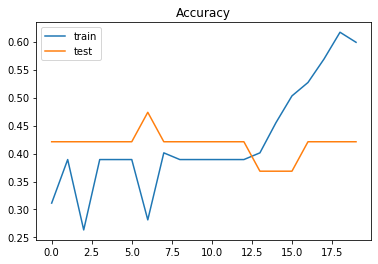

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [28]:
tfidf_model['class'] = comments['Category']
tfidf_model.dropna(subset = ['class'], inplace = True)
tfidf_model.drop(['class'], axis = 1, inplace = True)
print(tfidf_model.shape)
tfidf_model.head()
X1 = tfidf_model.to_numpy()

(266, 882)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(186, 882) (186, 7)
(80, 882) (80, 7)


In [30]:
model2 = Sequential()
model2.add(Embedding(882, 64, input_length=X1.shape[1])) # input_dim: This is the size of the vocabulary in the text data: len(word_index)
model2.add(LSTM(256, dropout=0.1, recurrent_dropout=0.1))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(7, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 32

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 167 samples, validate on 19 samples
Epoch 1/10
167/167 [==============================] - 8s 50ms/step - loss: 1.8809 - accuracy: 0.3174 - val_loss: 1.4973 - val_accuracy: 0.4211
Epoch 2/10
167/167 [==============================] - 7s 40ms/step - loss: 1.6099 - accuracy: 0.3892 - val_loss: 1.5091 - val_accuracy: 0.4211
Epoch 3/10
167/167 [==============================] - 8s 47ms/step - loss: 1.6169 - accuracy: 0.3892 - val_loss: 1.4777 - val_accuracy: 0.4211
Epoch 4/10
167/167 [==============================] - 10s 61ms/step - loss: 1.5857 - accuracy: 0.3892 - val_loss: 1.4351 - val_accuracy: 0.4211
Epoch 5/10
167/167 [==============================] - 9s 53ms/step - loss: 1.5855 - accuracy: 0.3892 - val_loss: 1.5015 - val_accuracy: 0.4211
Epoch 6/10
167/167 [==============================] - 10s 59ms/step - loss: 1.6080 - accuracy: 0.3892 - val_loss: 1.4771 - val_accuracy: 0.4211
Epoch 7/10
167/167 [==============================] - 9s 56ms/step - loss: 1.5887 - accuracy: 0

In [31]:
y_pred = model2.predict(X_train)
y_pred

array([[0.38050625, 0.11455975, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704],
       [0.38050625, 0.11455975, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704],
       [0.38050625, 0.11455975, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704],
       ...,
       [0.38050625, 0.11455975, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704],
       [0.38050625, 0.11455973, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704],
       [0.38050625, 0.11455973, 0.0529141 , ..., 0.04242464, 0.14258738,
        0.25303704]], dtype=float32)

### Doc2Vwc with Random Forest without PCA ###

In [68]:
doc2vec_matrix = pd.DataFrame(doc2vec_matrix)
doc2vec_matrix['class'] = comments['Category']
doc2vec_matrix.dropna(subset = ['class'], inplace = True)
factor = pd.factorize(doc2vec_matrix['class'])
doc2vec_matrix['class'] = factor[0]
definitions = factor[1]
doc2vec_matrix_Y = doc2vec_matrix['class']
print(doc2vec_matrix.head())
print(definitions)
#doc2vec_matrix.drop(['class'], axis = 1, inplace = True)
print(doc2vec_matrix.shape)
doc2vec_matrix_X = doc2vec_matrix.iloc[:, :-1]
doc2vec_matrix_X.head()
# doc2vec_matrix = doc2vec_matrix.to_numpy()
# doc2vec_matrix_Y = doc2vec_matrix_Y.to_numpy()

          0         1         2         3         4         5         6  \
0  0.001134 -0.001224  0.000577 -0.000671 -0.000966 -0.001329 -0.000031   
1 -0.000668 -0.000813 -0.000692  0.000507  0.000613  0.000346  0.000738   
2 -0.000554  0.001409  0.000070  0.000949  0.001392  0.000137  0.000325   
3  0.001211  0.001072  0.001175 -0.001408  0.001174  0.000043  0.001360   
4  0.000535  0.000198 -0.000475  0.000233  0.001141  0.000634  0.000184   

          7         8         9  ...       291       292       293       294  \
0 -0.000094  0.000663  0.001292  ... -0.000025 -0.000039  0.001440 -0.000635   
1  0.000875 -0.001171 -0.001491  ...  0.000870 -0.000397  0.001475  0.000808   
2 -0.000426  0.000354  0.001341  ...  0.000583  0.001274  0.000494 -0.001084   
3  0.000328  0.001170 -0.000268  ... -0.000554 -0.000276 -0.001107  0.001430   
4  0.000923 -0.001132 -0.000582  ... -0.000653 -0.000355  0.001086  0.000048   

        295       296       297       298       299  class  
0 -0.00

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.001134,-0.001224,0.000577,-0.000671,-0.000966,-0.001329,-0.000031,-0.000094,0.000663,0.001292,...,0.000432,-0.000025,-0.000039,0.001440,-0.000635,-0.001563,0.001122,0.000941,-0.001498,0.000281
1,-0.000668,-0.000813,-0.000692,0.000507,0.000613,0.000346,0.000738,0.000875,-0.001171,-0.001491,...,-0.000948,0.000870,-0.000397,0.001475,0.000808,0.000441,-0.000236,0.001568,0.000253,-0.000109
2,-0.000554,0.001409,0.000070,0.000949,0.001392,0.000137,0.000325,-0.000426,0.000354,0.001341,...,0.001643,0.000583,0.001274,0.000494,-0.001084,-0.001589,0.000515,-0.001367,-0.000921,-0.000602
3,0.001211,0.001072,0.001175,-0.001408,0.001174,0.000043,0.001360,0.000328,0.001170,-0.000268,...,-0.001382,-0.000554,-0.000276,-0.001107,0.001430,0.000787,0.000535,0.000608,-0.000729,0.000560
4,0.000535,0.000198,-0.000475,0.000233,0.001141,0.000634,0.000184,0.000923,-0.001132,-0.000582,...,0.000859,-0.000653,-0.000355,0.001086,0.000048,-0.000612,0.001234,0.001205,0.000072,-0.000931


In [92]:
# X_train = doc2vec_matrix_X.values
# Y_train = doc2vec_matrix_Y.values

X_train, X_test, Y_train, Y_test = train_test_split(doc2vec_matrix_X, doc2vec_matrix_Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
 
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

# Random Search Training: Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores (altogether 3*100 training sets)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, Y_train)
 
# Result analysis: evaluate random search
rf_random.best_params_ # get the best parameter set

#best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)

(186, 300) (186,)
(80, 300) (80,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 366,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [93]:
best_random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=10, max_features='sqrt', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                    min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.0, 
                                    n_estimators=366, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)
best_random.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=366,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = best_random.predict(X_test)
accuracy_score(Y_test, y_pred)

0.3125

In [95]:
Y_train

195    5
123    3
256    3
166    4
118    3
      ..
39     4
210    6
90     4
128    3
124    3
Name: class, Length: 186, dtype: int64

In [96]:
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

### Doc2Vwc with Random Forest with PCA ###

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(doc2vec_matrix.to_numpy())

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [101]:
print(pca.explained_variance_ratio_)

[0.92696375 0.05528042 0.01007266 0.00412599 0.0032055 ]


In [108]:
print(pca.components_)
print(pca.components_.shape)

[[ 1.57364146e-04 -1.84703275e-04  4.54267120e-05 ...  3.00375620e-04
   1.54173747e-04  9.99996686e-01]
 [ 1.65960440e-02  2.75429371e-03 -1.03778469e-01 ... -4.72438970e-03
  -1.16950111e-02  5.99212137e-04]
 [ 4.38958536e-02  4.59072954e-02  1.23288730e-02 ...  1.31078246e-01
   9.40889085e-02 -9.49006937e-04]
 [ 6.87841665e-03  1.84755477e-02  5.02046463e-02 ... -2.52470273e-02
   2.34350093e-02 -8.59558173e-04]
 [-2.07420060e-02  1.26942737e-01  4.25753526e-02 ... -5.26718444e-02
  -2.49316680e-02  1.96702390e-03]]
(5, 301)
